# 4. The average and the median of a sequence of numbers

In this lecture you will learn:
1. how to compute an average of a sequence of numbers;
2. how to sort a sequence of numbers and find its median;
3. how to filter data; and
4. how to visualize a sequence of numbers together with its average, or its median.

## 4.1. The average of a sequence of numbers

There are many situations where it is convenient to represent a sequence of numbers by some _typical value_. For example, students in Serbia get marks in several subjects, but at the end of the school year the educational system would like to have the achievement of each student represented by a single number.

It turns out that a good representative of a sequence of numbers is a number that is "in the middle," and one possibility od defining "the middle" is the _average value_ of the sequence:


$$
  \hbox{average value of } [x_1, x_2, \dots, x_n] = \frac{x_1 + x_2 + \dots + x_n}{n}.
$$

Therefore, in order to compute the average value of the sequence we have to divide the sum of the sequence by the length of the sequence. Both of these activities can be easily executed in Python by invoking the predefined functions `len` which computes the length of the sequence, and `sum` which computes the sum of the sequence:

In [1]:
L = [1, 3, 5, 7, 9, 10]
print(len(L))
print(sum(L))

6
35


(Note that the two functions are "built into" the Python interpreter and hence there is no need to hunt for them through libraries of functions!)

Therefore, the average of a sequence of numbers can be computed as follows:

In [2]:
print("The average value of", L, "is", sum(L) / len(L))

The average value of [1, 3, 5, 7, 9, 10] is 5.833333333333333


In this course we shall have to compute the average values quite often. So it pays off to define a new function that does it for us. Defining new functions in Python is easy: in order to `def`ine the function `average` that operates on a list of numbers `L` we simply have to instruct the system to `return` the quotient of the sum of the list and the length of the list:

In [3]:
def average(L):
    return sum(L) / len(L)

This Python code has introduced into the system a definition of a new activity: function `average` takes a list `L` of numbers and then returns the average of the list.

Note that the Python instructions that explain what the function actually does (the so-called _function body_) has to be indented by 4 blanks.

Let's see out function in action:

In [4]:
some_numbers = [1, 2, 3, 4, 5, 4, 3, 2, 1]
print("The average of the numers you have entered is", average(some_numbers))

The average of the numers you have entered is 2.7777777777777777


In many real-world applications the average value may turn out to be quite unpleasant to look at. It has become customary to round off the average value to, say, two decimal places. There is a function in Python that can do just that: `round(x, n)` will round off the decimal number `x` to `n` decimal places. For example:

In [5]:
round(1.666666666, 2)

1.67

Thus, in many cases it makes sense to write the following code:

In [6]:
print("The average of the numers you have entered is", round(average(some_numbers), 2))

The average of the numers you have entered is 2.78


## 4.2. Sorting a list of numbers and computing its median

To sort a sequence means to order its members in an increasing (or decreasing) way, like this:

$$
   [3, 1, 2, 5, 0, -1, 4] \to [-1, 0, 1, 2, 3, 4, 5]
$$

The built-in function `sort` can sort a list of numbers and you should invoke it like this:

In [7]:
L = [3, 1, 2, 5, 0, -1, 4]
L.sort()

If you now check the value of `L` you'll see that the elements of the list have been ordered:

In [8]:
L

[-1, 0, 1, 2, 3, 4, 5]

If you wish to order the elements of `L` in the reverse order (starting from the largest element) you can do it by throwing in an option `reverse=True`:

In [9]:
L.sort(reverse=True)
L

[5, 4, 3, 2, 1, 0, -1]

If the numbers we are working with oscillate a lot it may happen that the average is _not a good representative_ of the sequence. This is why the _median_ of a sequence is often used as another way to get the "number in the middle of the sequence".

A _median_ of a sequence of numbers is the element at the middle position of the sorted sequence.

In [10]:
def median(L):
    n = len(L)
    L.sort()
    return L[n//2]

Here is an example where the median of the sequence turns out to be a much better representative of the "middle value" of the sequence that the average value.

The list `salaries` contains salaries (in US dollars) of employees in a company.

In [11]:
salaries = [647, 570, 587, 576, 646, 519, 585, 686, 644, 604, 562, 589, 536, 675, 514, 620, 561, 567, 673, 577, 627, 643, 592, 509, 645, 625, 645, 608, 502, 552, 647, 601, 632, 583, 523, 546, 681, 637, 636, 541, 587, 573, 530, 596, 695, 619, 619, 543, 573, 672, 557, 668, 653, 513, 631, 656, 567, 538, 519, 576, 547, 687, 597, 644, 676, 661, 622, 593, 591, 629, 526, 536, 508, 510, 514, 584, 549, 632, 527, 602, 633, 636, 637, 639, 532, 619, 578, 534, 513, 540, 638, 580, 642, 553, 530, 699, 642, 556, 629, 620, 685, 574, 656, 673, 516, 591, 628, 513, 594, 667, 513, 528, 694, 660, 632, 570, 671, 522, 655, 694, 684, 635, 559, 561, 541, 643, 516, 655, 522, 554, 611, 669, 564, 540, 642, 645, 590, 658, 669, 530, 679, 572, 700, 637, 650, 577, 696, 695, 551, 586, 581, 547, 545, 558, 670, 548, 536, 622, 586, 700, 585, 568, 582, 589, 649, 575, 584, 514, 526, 686, 668, 532, 582, 651, 693, 693, 556, 509, 562, 672, 673, 658, 573, 509, 698, 652, 541, 605, 659, 688, 591, 691, 548, 699, 656, 642, 598, 562, 549, 578, 515, 558, 556, 504, 602, 521, 660, 644, 587, 683, 575, 592, 580, 594, 573, 651, 690, 544, 608, 627, 631, 529, 630, 506, 693, 691, 665, 508, 621, 540, 508, 522, 660, 585, 679, 542, 600, 678, 557, 687, 571, 610, 502, 695, 557, 577, 668, 580, 631, 618, 587, 545, 568, 518, 693, 685, 626, 605, 570, 695, 672, 691, 556, 550, 530, 661, 634, 512, 666, 533, 507, 548, 672, 509, 578, 501, 688, 603, 611, 557, 615, 589, 535, 652, 690, 592, 608, 640, 697, 614, 571, 516, 692, 513, 556, 624, 648, 585, 680, 514, 519, 688, 667, 526, 617, 609, 661, 686, 524, 502, 558, 576, 568, 673, 603, 606, 548, 593, 626, 649, 597, 617, 649, 519, 630, 632, 610, 689, 594, 584, 529, 649, 628, 510, 588, 585, 572, 622, 566, 699, 573, 698, 561, 596, 529, 541, 689, 666, 536, 517, 650, 565, 615, 515, 638, 653, 695, 522, 611, 660, 574, 552, 594, 685, 699, 533, 681, 586, 632, 518, 592, 506, 506, 643, 602, 533, 553, 654, 610, 510, 578, 584, 534, 616, 629, 686, 622, 545, 605, 680, 700, 647, 564, 587, 569, 686, 504, 661, 639, 688, 681, 572, 544, 563, 549, 524, 632, 666, 639, 529, 520, 622, 699, 563, 529, 538, 533, 579, 679, 619, 591, 527, 579, 561, 694, 676, 536, 558, 546, 590, 567, 539, 596, 515, 674, 655, 657, 537, 681, 602, 645, 598, 595, 671, 643, 602, 695, 620, 639, 669, 653, 632, 556, 501, 572, 635, 699, 601, 699, 607, 552, 589, 687, 501, 615, 567, 538, 559, 520, 572, 519, 643, 641, 696, 539, 570, 567, 506, 552, 534, 552, 625, 508, 564, 508, 543, 509, 507, 502, 511, 683, 627, 617, 655, 655, 682, 624, 683, 602, 566, 525, 645, 535, 668, 590, 664, 661, 632, 527, 675, 638, 507, 623, 645, 542, 538, 618, 662, 523, 675, 518, 663, 619, 610, 681, 530, 663, 548, 652, 650, 590, 521, 558, 619, 566, 615, 680, 665, 612, 664, 668, 563, 649, 532, 674, 553, 627, 544, 513, 629, 635, 581, 521, 681, 595, 599, 522, 566, 614, 652, 671, 692, 622, 574, 697, 695, 500, 553, 559, 671, 691, 683, 612, 609, 508, 647, 599, 543, 658, 648, 557, 583, 546, 620, 634, 545, 639, 559, 587, 575, 533, 507, 565, 551, 583, 577, 583, 631, 586, 647, 519, 550, 677, 556, 619, 549, 676, 616, 559, 539, 593, 687, 699, 632, 578, 603, 621, 560, 500, 585, 581, 593, 583, 525, 560, 518, 515, 658, 551, 606, 657, 563, 521, 524, 529, 688, 579, 673, 644, 539, 664, 585, 600, 589, 574, 573, 679, 624, 587, 652, 660, 538, 600, 608, 693, 639, 647, 557, 536, 581, 597, 516, 530, 510, 557, 561, 680, 518, 534, 573, 609, 600, 575, 545, 571, 504, 604, 619, 606, 567, 653, 524, 644, 678, 661, 500, 516, 601, 521, 605, 589, 528, 576, 524, 616, 576, 567, 693, 668, 537, 659, 647, 560, 561, 597, 564, 529, 629, 607, 559, 532, 649, 550, 533, 677, 554, 685, 690, 696, 693, 528, 569, 598, 546, 668, 588, 575, 618, 652, 639, 673, 661, 519, 565, 555, 698, 589, 686, 639, 520, 660, 595, 619, 632, 651, 697, 614, 615, 515, 574, 668, 657, 591, 602, 506, 691, 540, 662, 688, 519, 573, 630, 620, 642, 517, 644, 543, 586, 638, 574, 593, 553, 549, 537, 679, 679, 615, 681, 556, 635, 584, 606, 653, 653, 615, 639, 563, 642, 633, 537, 584, 699, 639, 695, 697, 635, 634, 630, 624, 690, 669, 515, 663, 651, 696, 643, 548, 563, 609, 690, 546, 634, 667, 543, 692, 652, 553, 590, 647, 505, 621, 526, 600, 533, 541, 597, 503, 571, 575, 609, 527, 593, 571, 690, 504, 641, 659, 589, 601, 667, 627, 654, 673, 645, 533, 690, 699, 567, 621, 640, 657, 537, 634, 608, 621, 676, 665, 584, 610, 656, 610, 690, 591, 653, 603, 514, 520, 546, 547, 678, 682, 697, 532, 591, 504, 532, 660, 658, 623, 554, 677, 601, 611, 504, 643, 615, 630, 576, 595, 520, 695, 506, 548, 656, 541, 520, 628, 530, 658, 671, 597, 549, 646, 617, 599, 648, 649, 511, 627, 538, 556, 585, 537, 658, 583, 557, 647, 560, 582, 636, 622, 646, 511, 683, 595, 665, 584, 607, 534, 609, 505, 555, 609, 604, 592, 549, 507, 536, 691, 669, 698, 575, 502, 556, 613, 540, 645, 696, 603, 698, 612, 695, 502, 671, 623, 688, 694, 644, 581, 689, 552, 583, 597, 537, 650, 687, 624, 653, 656, 523, 518, 659, 693, 558, 683, 501, 520, 663, 573, 696, 584, 544, 585, 634, 551, 515, 617, 671, 554, 688, 604, 664, 596, 644, 587, 693, 612, 677, 633, 679, 557, 576, 590, 502, 543, 615, 600, 600, 697, 632, 596, 628, 598, 514, 598, 657, 622, 639, 576, 577, 602, 680, 518, 678, 671, 541, 545, 522, 587, 574, 665, 601, 555, 561, 546, 661, 687, 540, 604, 618, 552, 512, 524, 663, 589, 659, 688, 690, 557, 691, 604, 547, 556, 630, 679, 570, 526, 633, 587, 606, 649, 553, 650, 527, 534, 582, 664, 610, 607, 620, 632, 667, 685, 551, 580, 613, 615, 513, 584, 511, 563, 627, 555, 545, 530, 660, 572, 653, 611, 671, 551, 573, 690, 556, 689, 589, 556, 583, 559, 636, 598, 587, 637, 650, 512, 523, 696, 696, 688, 524, 642, 580, 675, 677, 576, 621, 647, 628, 614, 525, 554, 613, 558, 578, 589, 568, 555, 520, 679, 633, 559, 628, 551, 512, 667, 602, 555, 619, 662, 699, 552, 659, 640, 635, 589, 578, 555, 689, 614, 641, 606, 662, 511, 651, 696, 553, 660, 564, 615, 641, 592, 513, 609, 591, 589, 681, 575, 541, 552, 562, 682, 636, 572, 691, 523, 572, 588, 553, 608, 668, 552, 612, 671, 636, 569, 698, 507, 671, 542, 592, 663, 574, 605, 650, 675, 548, 504, 669, 619, 647, 628, 687, 638, 672, 554, 635, 526, 536, 576, 502, 560, 592, 638, 587, 518, 570, 640, 519, 510, 682, 647, 666, 549, 515, 651, 656, 569, 691, 593, 550, 522, 683, 574, 597, 628, 503, 672, 544, 516, 655, 665, 665, 616, 631, 557, 565, 607, 684, 655, 622, 586, 628, 629, 645, 602, 570, 626, 552, 697, 534, 570, 672, 506, 538, 626, 595, 582, 570, 695, 600, 689, 535, 555, 619, 502, 589, 589, 673, 643, 618, 684, 527, 510, 579, 500, 547, 561, 664, 647, 637, 531, 611, 585, 582, 519, 549, 689, 696, 516, 536, 591, 542, 697, 631, 641, 667, 509, 635, 643, 555, 667, 592, 633, 650, 619, 628, 562, 576, 602, 555, 637, 547, 605, 597, 563, 562, 620, 628, 652, 536, 618, 695, 517, 654, 588, 598, 598, 633, 692, 521, 641, 564, 610, 693, 507, 594, 563, 528, 532, 669, 597, 648, 608, 577, 677, 625, 657, 668, 554, 517, 508, 568, 629, 660, 519, 597, 668, 591, 655, 639, 646, 562, 664, 551, 635, 526, 581, 637, 503, 500, 531, 533, 700, 570, 643, 609, 633, 587, 697, 650, 603, 536, 661, 672, 652, 588, 687, 585, 521, 554, 530, 565, 557, 644, 532, 607, 558, 654, 540, 657, 518, 552, 603, 596, 627, 525, 505, 670, 545, 697, 550, 525, 616, 536, 694, 519, 595, 529, 574, 653, 644, 519, 543, 649, 634, 569, 505, 582, 674, 504, 655, 691, 609, 532, 610, 544, 579, 505, 531, 516, 523, 568, 519, 627, 533, 650, 599, 637, 660, 617, 522, 614, 513, 640, 616, 524, 510, 605, 616, 658, 639, 562, 667, 648, 528, 634, 682, 572, 573, 593, 644, 584, 684, 592, 574, 570, 558, 532, 567, 565, 610, 501, 581, 624, 672, 551, 530, 633, 650, 666, 681, 563, 521, 608, 533, 666, 688, 681, 594, 537, 651, 587, 688, 503, 610, 545, 671, 521, 625, 682, 620, 543, 642, 661, 691, 581, 607, 557, 586, 592, 516, 574, 648, 504, 537, 641, 558, 562, 561, 526, 693, 500, 610, 694, 605, 518, 511, 524, 597, 689, 553, 648, 690, 606, 529, 529, 621, 570, 619, 674, 652, 598, 668, 634, 658, 509, 593, 662, 527, 666, 526, 685, 686, 613, 655, 652, 521, 503, 619, 560, 594, 666, 689, 551, 514, 620, 505, 631, 508, 579, 688, 556, 644, 612, 620, 529, 635, 617, 659, 679, 516, 528, 685, 635, 587, 639, 620, 610, 560, 524, 670, 557, 696, 518, 676, 635, 510, 635, 532, 582, 694, 685, 531, 695, 589, 694, 525, 636, 590, 670, 690, 593, 557, 571, 502, 667, 606, 560, 665, 657, 632, 539, 601, 640, 585, 699, 516, 587, 694, 677, 621, 664, 655, 523, 648, 543, 598, 566, 639, 583, 667, 646, 636, 508, 551, 574, 596, 638, 515, 521, 559, 648, 548, 673, 646, 656, 639, 573, 578, 630, 552, 555, 530, 558, 597, 528, 551, 557, 556, 648, 606, 634, 687, 544, 657, 552, 553, 510, 598, 555, 642, 602, 662, 670, 679, 683, 556, 630, 641, 617, 621, 685, 561, 559, 698, 683, 645, 582, 652, 573, 583, 553, 616, 533, 640, 542, 685, 534, 675, 533, 511, 621, 685, 669, 511, 514, 590, 564, 598, 652, 504, 633, 663, 528, 505, 627, 691, 672, 653, 602, 602, 653, 682, 533, 517, 619, 647, 530, 500, 656, 548, 641, 568, 597, 633, 678, 557, 585, 581, 661, 503, 523, 601, 685, 607, 531, 622, 572, 651, 565, 574, 683, 686, 574, 621, 695, 531, 614, 512, 504, 662, 611, 510, 587, 602, 542, 629, 564, 510, 522, 632, 653, 506, 524, 544, 617, 678, 544, 634, 657, 565, 669, 503, 511, 638, 688, 661, 666, 650, 694, 640, 533, 520, 525, 612, 676, 675, 634, 686, 575, 700, 588, 588, 650, 563, 692, 536, 633, 538, 656, 556, 509, 680, 621, 519, 507, 689, 661, 519, 500, 564, 613, 529, 598, 695, 570, 505, 631, 500, 698, 593, 539, 601, 687, 693, 687, 674, 596, 595, 694, 697, 547, 564, 641, 685, 548, 583, 529, 666, 646, 597, 629, 631, 618, 606, 620, 658, 670, 557, 590, 593, 505, 646, 687, 689, 523, 538, 591, 647, 623, 566, 685, 568, 658, 685, 545, 621, 684, 587, 531, 553, 598, 617, 520, 654, 577, 547, 652, 512, 624, 669, 504, 563, 670, 673, 679, 691, 684, 665, 536, 627, 674, 654, 607, 514, 584, 588, 595, 588, 635, 543, 546, 614, 534, 554, 648, 552, 547, 551, 574, 594, 662, 604, 686, 566, 645, 682, 513, 539, 593, 683, 549, 617, 694, 614, 676, 548, 630, 520, 664, 577, 685, 683, 505, 530, 637, 573, 641, 700, 638, 550, 536, 537, 638, 581, 573, 648, 546, 601, 681, 611, 680, 574, 510, 677, 531, 544, 625, 544, 652, 602, 583, 590, 519, 667, 559, 663, 509, 569, 645, 691, 672, 567, 647, 638, 670, 603, 588, 589, 642, 569, 507, 556, 528, 568, 519, 521, 504, 518, 603, 683, 645, 555, 598, 638, 600, 525, 546, 553, 665, 557, 512, 612, 606, 604, 630, 633, 557, 696, 543, 692, 647, 538, 596, 612, 602, 643, 617, 656, 649, 647, 502, 602, 541, 505, 521, 564, 687, 611, 577, 543, 679, 629, 695, 597, 559, 623, 555, 679, 538, 502, 554, 551, 567, 694, 505, 537, 591, 675, 552, 580, 592, 557, 697, 697, 576, 690, 515, 623, 548, 527, 635, 675, 519, 559, 622, 523, 682, 661, 580, 610, 547, 651, 526, 618, 650, 511, 590, 662, 633, 575, 648, 645, 677, 585, 613, 665, 666, 671, 524, 582, 557, 661, 671, 602, 552, 524, 576, 665, 526, 523, 505, 653, 598, 507, 531, 566, 660, 536, 542, 638, 625, 539, 533, 568, 517, 625, 578, 671, 586, 629, 504, 647, 522, 567, 552, 515, 501, 508, 666, 543, 558, 567, 608, 576, 685, 620, 694, 511, 676, 621, 625, 654, 584, 588, 512, 664, 632, 658, 669, 541, 623, 622, 615, 698, 528, 549, 622, 571, 545, 607, 619, 695, 665, 602, 620, 621, 636, 567, 596, 542, 615, 565, 688, 630, 566, 667, 659, 646, 513, 524, 601, 636, 652, 616, 608, 540, 677, 687, 617, 575, 516, 624, 678, 555, 519, 548, 512, 597, 648, 561, 656, 565, 502, 619, 656, 636, 646, 606, 566, 673, 551, 660, 644, 524, 700, 692, 526, 575, 525, 648, 515, 680, 550, 517, 510, 577, 653, 674, 651, 578, 565, 561, 561, 625, 634, 549, 625, 647, 522, 581, 653, 643, 693, 620, 579, 670, 579, 584, 650, 566, 654, 634, 687, 589, 599, 558, 664, 570, 635, 588, 628, 517, 634, 570, 666, 556, 541, 506, 665, 663, 655, 585, 689, 510, 624, 610, 587, 674, 673, 598, 610, 614, 566, 663, 580, 639, 678, 661, 647, 570, 592, 617, 517, 551, 696, 693, 696, 568, 657, 629, 627, 619, 532, 566, 546, 657, 542, 657, 509, 539, 527, 541, 682, 576, 535, 552, 647, 611, 501, 687, 563, 590, 660, 510, 583, 545, 654, 590, 620, 641, 552, 510, 614, 671, 584, 505, 596, 527, 620, 512, 567, 569, 686, 645, 636, 542, 666, 503, 665, 627, 580, 662, 584, 618, 629, 540, 628, 647, 619, 513, 547, 533, 529, 558, 688, 697, 601, 675, 650, 649, 534, 619, 693, 525, 698, 608, 677, 623, 688, 517, 552, 549, 572, 525, 698, 620, 508, 604, 598, 684, 664, 577, 696, 685, 670, 647, 524, 554, 503, 635, 552, 604, 537, 595, 639, 516, 591, 570, 668, 652, 556, 525, 535, 590, 694, 673, 620, 601, 550, 602, 536, 646, 520, 686, 586, 669, 505, 527, 646, 645, 594, 557, 607, 555, 691, 652, 555, 585, 615, 543, 591, 625, 571, 686, 686, 551, 664, 678, 611, 533, 564, 635, 516, 657, 616, 567, 549, 503, 572, 634, 540, 552, 692, 522, 619, 675, 577, 568, 568, 699, 635, 537, 545, 509, 693, 652, 560, 659, 586, 590, 567, 603, 563, 518, 607, 632, 650, 603, 548, 667, 500, 575, 664, 660, 612, 666, 669, 566, 665, 532, 624, 528, 539, 685, 674, 520, 650, 506, 602, 607, 652, 504, 521, 630, 588, 699, 675, 661, 551, 524, 506, 650, 548, 591, 515, 637, 635, 587, 602, 606, 688, 616, 685, 504, 648, 527, 516, 588, 511, 686, 523, 575, 526, 529, 587, 517, 593, 567, 688, 663, 689, 512, 641, 556, 664, 575, 624, 618, 551, 604, 516, 598, 654, 602, 530, 622, 598, 613, 654, 504, 593, 558, 700, 579, 647, 529, 548, 577, 671, 697, 668, 589, 569, 646, 661, 598, 513, 519, 608, 630, 665, 576, 591, 657, 576, 691, 503, 670, 659, 580, 580, 599, 675, 554, 536, 501, 695, 659, 691, 672, 649, 505, 665, 647, 657, 534, 700, 564, 541, 635, 571, 511, 613, 599, 526, 672, 533, 575, 612, 503, 667, 558, 575, 585, 687, 626, 597, 619, 606, 627, 625, 584, 623, 570, 617, 617, 505, 634, 505, 564, 513, 700, 533, 570, 688, 657, 669, 616, 505, 602, 676, 608, 645, 651, 548, 570, 547, 504, 587, 575, 612, 619, 527, 677, 647, 619, 599, 557, 682, 511, 609, 672, 596, 556, 631, 686, 627, 583, 516, 644, 564, 691, 545, 541, 679, 500, 624, 647, 656, 508, 515, 578, 607, 692, 501, 503, 667, 608, 548, 622, 580, 539, 502, 600, 655, 683, 645, 531, 657, 692, 557, 574, 653, 656, 645, 551, 546, 699, 665, 519, 698, 565, 514, 605, 502, 557, 578, 508, 590, 689, 501, 601, 502, 689, 513, 575, 624, 666, 552, 562, 687, 620, 537, 580, 556, 689, 619, 504, 540, 582, 577, 521, 682, 501, 662, 638, 682, 647, 525, 559, 618, 634, 520, 619, 532, 611, 501, 647, 626, 538, 666, 500, 591, 600, 663, 631, 608, 628, 509, 676, 683, 560, 603, 547, 648, 679, 531, 543, 551, 605, 603, 569, 546, 553, 588, 699, 554, 694, 516, 638, 654, 576, 563, 593, 666, 616, 543, 600, 542, 575, 689, 627, 575, 687, 646, 500, 622, 611, 618, 671, 519, 643, 506, 672, 700, 540, 635, 651, 669, 696, 600, 562, 580, 617, 610, 558, 523, 620, 501, 591, 532, 594, 601, 692, 536, 561, 676, 507, 618, 597, 654, 580, 500, 696, 622, 539, 627, 622, 615, 517, 561, 647, 573, 603, 538, 677, 548, 652, 628, 613, 543, 564, 593, 546, 660, 631, 595, 511, 524, 578, 666, 632, 633, 524, 555, 530, 554, 592, 592, 595, 656, 519, 660, 524, 632, 632, 536, 574, 505, 562, 660, 501, 666, 544, 668, 681, 657, 573, 625, 628, 669, 610, 630, 662, 694, 681, 671, 634, 501, 591, 520, 524, 564, 684, 613, 506, 647, 591, 591, 581, 593, 575, 564, 609, 573, 692, 614, 675, 695, 574, 658, 656, 636, 550, 678, 603, 559, 564, 680, 627, 635, 621, 662, 562, 657, 676, 664, 691, 561, 620, 536, 698, 651, 521, 629, 664, 654, 538, 611, 503, 664, 650, 566, 662, 668, 596, 645, 536, 558, 649, 697, 543, 600, 537, 683, 643, 617, 575, 641, 519, 523, 586, 506, 688, 679, 567, 679, 528, 663, 545, 504, 519, 548, 641, 550, 666, 614, 516, 620, 654, 629, 645, 531, 655, 517, 696, 622, 545, 573, 557, 510, 555, 577, 676, 635, 517, 634, 669, 504, 608, 537, 528, 602, 618, 590, 655, 677, 691, 504, 567, 528, 553, 534, 691, 686, 604, 592, 569, 548, 571, 590, 575, 574, 594, 619, 558, 604, 668, 562, 656, 565, 566, 649, 605, 527, 671, 630, 569, 578, 591, 541, 598, 612, 568, 653, 609, 604, 619, 668, 685, 538, 653, 567, 626, 501, 542, 624, 508, 559, 663, 649, 637, 629, 525, 662, 675, 626, 675, 546, 587, 614, 626, 595, 507, 583, 523, 644, 590, 661, 638, 661, 515, 605, 572, 523, 643, 565, 634, 622, 522, 551, 623, 663, 631, 655, 661, 694, 634, 539, 512, 620, 564, 670, 639, 570, 538, 700, 633, 533, 519, 680, 509, 697, 578, 636, 565, 580, 567, 656, 574, 520, 500, 541, 578, 667, 629, 543, 669, 681, 532, 557, 625, 636, 617, 639, 684, 696, 542, 535, 632, 527, 537, 530, 555, 616, 642, 616, 503, 536, 533, 511, 633, 679, 500, 600, 646, 548, 509, 515, 519, 604, 542, 500, 588, 630, 583, 668, 571, 602, 638, 567, 667, 688, 519, 648, 580, 533, 668, 525, 516, 524, 541, 646, 674, 528, 548, 661, 578, 570, 698, 700, 500, 540, 636, 676, 602, 548, 553, 672, 663, 673, 653, 660, 523, 674, 533, 577, 607, 523, 524, 504, 505, 562, 537, 691, 615, 650, 552, 565, 560, 586, 699, 650, 512, 678, 599, 679, 557, 556, 652, 555, 645, 521, 660, 605, 566, 643, 544, 674, 571, 618, 515, 548, 637, 598, 672, 685, 608, 679, 696, 663, 631, 618, 638, 507, 665, 666, 583, 610, 516, 529, 543, 574, 556, 638, 658, 516, 566, 560, 634, 590, 657, 652, 575, 699, 565, 658, 507, 698, 577, 578, 504, 693, 532, 591, 674, 510, 620, 691, 660, 607, 676, 535, 689, 635, 587, 629, 506, 635, 597, 624, 539, 646, 506, 594, 564, 633, 599, 640, 670, 660, 605, 543, 520, 649, 579, 602, 521, 667, 584, 636, 567, 544, 648, 665, 504, 648, 566, 617, 684, 693, 628, 667, 650, 567, 649, 658, 695, 641, 520, 649, 529, 541, 654, 685, 618, 596, 653, 589, 605, 607, 691, 693, 620, 521, 699, 700, 511, 597, 666, 648, 697, 517, 649, 591, 579, 663, 560, 642, 665, 690, 568, 587, 567, 575, 611, 595, 597, 533, 559, 586, 560, 510, 630, 626, 515, 654, 669, 524, 523, 663, 518, 559, 658, 538, 548, 647, 506, 700, 692, 536, 695, 556, 700, 533, 661, 663, 693, 670, 669, 581, 518, 658, 663, 616, 523, 646, 691, 631, 553, 632, 570, 505, 556, 668, 552, 610, 511, 601, 658, 610, 629, 644, 520, 690, 512, 551, 553, 605, 519, 649, 635, 619, 695, 520, 520, 602, 641, 617, 606, 675, 511, 669, 516, 691, 612, 655, 558, 633, 599, 540, 700, 512, 651, 503, 656, 581, 614, 673, 630, 686, 514, 692, 608, 630, 645, 538, 620, 602, 657, 522, 500, 635, 641, 556, 575, 650, 556, 624, 533, 579, 683, 667, 665, 533, 548, 571, 632, 593, 677, 505, 512, 681, 645, 528, 592, 550, 700, 607, 551, 686, 535, 567, 510, 504, 596, 656, 570, 501, 567, 507, 614, 521, 630, 559, 574, 698, 549, 643, 528, 623, 630, 503, 544, 675, 632, 656, 522, 570, 636, 551, 595, 562, 576, 647, 571, 700, 634, 636, 574, 542, 681, 550, 676, 658, 553, 559, 583, 587, 698, 699, 662, 665, 593, 579, 588, 575, 669, 564, 645, 524, 693, 509, 661, 524, 561, 512, 518, 657, 529, 678, 571, 611, 502, 633, 646, 597, 631, 604, 641, 680, 598, 655, 543, 614, 661, 598, 572, 640, 509, 641, 597, 638, 559, 630, 673, 687, 679, 626, 656, 605, 616, 579, 539, 606, 555, 646, 574, 598, 583, 672, 521, 619, 683, 539, 581, 517, 615, 546, 624, 659, 505, 567, 555, 688, 640, 620, 558, 631, 549, 507, 596, 635, 656, 654, 660, 687, 641, 530, 658, 697, 574, 595, 670, 681, 691, 589, 659, 561, 582, 645, 573, 616, 628, 504, 507, 659, 633, 526, 551, 687, 688, 627, 631, 677, 683, 519, 644, 561, 628, 605, 664, 552, 618, 669, 686, 647, 508, 515, 652, 566, 671, 690, 540, 510, 699, 593, 570, 549, 655, 697, 633, 700, 698, 521, 655, 518, 531, 580, 521, 647, 545, 516, 653, 563, 602, 523, 584, 593, 533, 646, 519, 636, 564, 551, 542, 550, 543, 650, 522, 560, 643, 613, 500, 609, 620, 660, 561, 696, 540, 619, 597, 619, 597, 539, 607, 544, 599, 682, 625, 610, 535, 689, 639, 516, 614, 668, 684, 596, 548, 642, 692, 513, 532, 517, 605, 693, 691, 621, 674, 699, 614, 692, 633, 689, 512, 557, 612, 571, 521, 578, 632, 684, 695, 617, 565, 612, 665, 687, 631, 610, 637, 668, 592, 549, 501, 664, 569, 686, 583, 573, 541, 569, 692, 666, 533, 562, 663, 680, 581, 609, 527, 666, 532, 511, 503, 575, 604, 593, 629, 671, 612, 631, 638, 630, 606, 546, 561, 697, 697, 687, 592, 500, 591, 552, 528, 573, 630, 613, 662, 525, 628, 645, 686, 557, 635, 522, 643, 573, 558, 515, 624, 571, 667, 529, 611, 529, 555, 592, 600, 575, 566, 599, 636, 619, 590, 563, 501, 672, 534, 615, 655, 680, 688, 553, 683, 586, 550, 551, 563, 667, 558, 651, 523, 596, 592, 2458351, 675, 611, 638, 614, 506, 591, 592, 556, 605, 589, 606, 681, 635, 690, 615, 583, 608, 631, 644, 521, 675, 586, 593, 630, 692, 523, 629, 573, 650, 551, 563, 644, 605, 578, 659, 666, 510, 522, 532, 598, 616, 539, 568, 565, 565, 648, 609, 615, 592, 674, 692, 576, 569, 553, 599, 621, 648, 577, 634, 686, 514, 520, 675, 586, 566, 538, 619, 688, 525, 537, 687, 623, 566, 587, 617, 535, 692, 509, 570, 548, 604, 586, 595, 628, 638, 580, 596, 589, 552, 590, 645, 581, 652, 522, 566, 506, 610, 663, 607, 655, 523, 632, 561, 515, 549, 616, 554, 635, 569, 609, 502, 601, 631, 588, 697, 605, 626, 620, 617, 537, 577, 625, 514, 521, 524, 521, 558, 695, 553, 676, 607, 631, 544, 643, 670, 575, 577, 541, 553, 660, 504, 542, 681, 578, 588, 638, 615, 693, 669, 695, 555, 517, 662, 664, 531, 658, 699, 612, 563, 583, 665, 602, 581, 673, 674, 627, 629, 597, 629, 504, 550, 668, 561, 662, 541, 608, 616, 523, 640, 508, 534, 673, 658, 571, 513, 675, 623, 603, 686, 585, 623, 548, 504, 549, 558, 633, 574, 679, 636, 598, 682, 585, 570, 529, 682, 548, 687, 700, 555, 587, 585, 700, 639, 609, 503, 607, 554, 559, 690, 621, 509, 584, 523, 651, 670, 526, 610, 590, 582, 680, 684, 645, 616, 588, 677, 520, 639, 559, 601, 662, 695, 614, 592, 523, 687, 537, 534, 535, 637, 557, 536, 691, 599, 630, 582, 543, 655, 523, 652, 606, 668, 547, 689, 541, 700, 698, 686, 617, 606, 683, 502, 627, 585, 515, 541, 556, 563, 617, 667, 685, 640, 537, 683, 639, 661, 649, 583, 700, 580, 601, 646, 673, 620, 680, 617, 677, 629, 646, 619, 665, 516, 645, 623, 536, 518, 507, 577, 543, 594, 534, 687, 606, 693, 578, 675, 571, 683, 572, 613, 574, 628, 661, 504, 679, 567, 551, 585, 622, 579, 700, 568, 672, 665, 673, 641, 633, 545, 584, 582, 628, 629, 625, 518, 512, 700, 521, 690, 533, 593, 595, 594, 553, 548, 634, 505, 592, 658, 601, 559, 638, 630, 654, 650, 510, 690, 569, 529, 679, 681, 559, 505, 558, 532, 538, 610, 520, 541, 575, 535, 580, 572, 566, 636, 695, 543, 518, 693, 574, 644, 500, 574, 509, 670, 603, 593, 667, 507, 528, 655, 549, 569, 647, 576, 515, 621, 663, 671, 541, 585, 591, 553, 539, 675, 666, 545, 672, 556, 615, 677, 536, 517, 651, 590, 656, 513, 553, 556, 667, 560, 587, 518, 660, 669, 522, 530, 616, 557, 534, 681, 546, 580, 613, 605, 565, 564, 575, 523, 662, 544, 685, 517, 526, 638, 637, 502, 592, 664, 600, 578, 598, 607, 607, 638, 637, 622, 623, 603, 547, 576, 609, 582, 507, 502, 687, 529, 670, 564, 612, 566, 541, 510, 542, 686, 667, 643, 693, 635, 553, 582, 588, 683, 507, 604, 695, 537, 576, 700, 641, 546, 622, 531, 677, 610, 636, 550, 681, 506, 591, 534, 571, 621, 658, 602, 677, 553, 535, 638, 512, 582, 587, 591, 654, 519, 502, 692, 699, 640, 671, 575, 537, 690, 566, 631, 606, 639, 686, 686, 606, 692, 576, 535, 644, 531, 513, 500, 648, 528, 692, 599, 632, 685, 639, 616, 686, 695, 597, 659, 654, 516, 555, 543, 546, 635, 689, 590, 506, 509, 679, 531, 617, 622, 688, 587, 610, 538, 500, 557, 659, 637, 605, 536, 591, 656, 618, 686, 568, 643, 532, 553, 691, 552, 558, 530, 622, 672, 608, 669, 547, 583, 682, 517, 590, 557, 667, 534, 509, 563, 696, 515, 618, 656, 636, 666, 689, 654, 620, 509, 551, 647, 593, 661, 609, 660, 513, 558, 615, 567, 583, 510, 602, 563, 517, 686, 699, 598, 663, 562, 546, 644, 525, 628, 641, 587, 632, 605, 519, 593, 575, 549, 672, 566, 687, 676, 630, 620, 515, 626, 588, 553, 548, 570, 593, 684, 596, 639, 635, 547, 638, 653, 554, 512, 514, 571, 513, 626, 612, 669, 620, 570, 616, 563, 693, 689, 666, 569, 622, 602, 638, 598, 657, 567, 567, 695, 628, 593, 527, 607, 606, 506, 581, 688, 536, 697, 641, 501, 647, 513, 618, 593, 642, 696, 543, 658, 516, 614, 664, 571, 666, 595, 547, 698, 652, 629, 618, 558, 533, 548, 600, 600, 695, 587, 699, 650, 648, 542, 592, 537, 671, 550, 524, 699, 522, 590, 582, 594, 688, 573, 501, 548, 560, 559, 517, 691, 532, 689, 512, 648, 596, 622, 659, 500, 639, 565, 512, 553, 506, 648, 652, 567, 603, 699, 585, 522, 639, 674, 509, 503, 671, 657, 664, 600, 560, 572, 676, 572, 678, 511, 651, 515, 583, 634, 660, 697, 652, 550, 580, 556, 626, 628, 570, 612, 540, 634, 518, 653, 620, 675, 530, 545, 675, 656, 543, 699, 602, 579, 501, 667, 641, 686, 643, 502, 679, 547, 625, 694, 624, 521, 539, 642, 688, 605, 542, 545, 519, 558, 655, 629, 564, 536, 625, 695, 614, 618, 535, 599, 652, 539, 614, 660, 648, 641, 679, 666, 595, 585, 671, 659, 582, 698, 645, 588, 561, 524, 567, 502, 564, 674, 506, 587, 645, 679, 589, 570, 584, 563, 671, 585, 501, 684, 663, 579, 662, 649, 504, 641, 671, 621, 595, 581, 653, 583, 623, 619, 647, 529, 594, 516, 663, 528, 691, 647, 645, 538, 693, 648, 512, 618, 619, 607, 645, 555, 543, 555, 633, 519, 505, 550, 556, 541, 638, 652, 524, 661, 656, 657, 655, 656, 634, 645, 549, 518, 596, 558, 541, 593, 636, 617, 527, 669, 625, 546, 559, 682, 576, 647, 554, 699, 641, 516, 615, 692, 605, 568, 569, 622, 696, 694, 625, 678, 619, 596, 555, 576, 514, 518, 537, 504, 697, 554, 694, 559, 675, 654, 636, 586, 597, 525, 557, 600, 688, 642, 676, 583, 560, 558, 577, 664, 604, 609, 625, 508, 542, 540, 689, 620, 619, 550, 541, 536, 640, 569, 608, 573, 696, 595, 599, 657, 670, 687, 636, 656, 553, 610, 551, 627, 627, 647, 693, 542, 613, 666, 690, 610, 528, 540, 579, 635, 594, 531, 576, 576, 545, 592, 635, 512, 612, 579, 569, 579, 582, 638, 627, 688, 527, 659, 547, 698, 568, 630, 599, 641, 648, 584, 545, 512, 598, 561, 578, 538, 547, 613, 668, 593, 593, 517, 542, 591, 652, 632, 686, 531, 527, 552, 658, 518, 671, 653, 515, 652, 650, 565, 530, 578, 565, 536, 581, 524, 564, 604, 540, 509, 585, 513, 631, 548, 666, 600, 675, 651, 580, 541, 626, 670, 626, 627, 586, 631, 537, 557, 654, 620, 639, 591, 660, 525, 501, 503, 530, 579, 697, 522, 550, 505, 628, 530, 595, 638, 502, 519, 659, 656, 700, 524, 577, 594, 592, 606, 610, 626, 687, 555, 531, 673, 582, 637, 601, 578, 622, 529, 516, 655, 546, 600, 604, 655, 624, 548, 558, 627, 656, 644, 573, 618, 619, 664, 650, 620, 559, 551, 523, 625, 552, 569, 679, 578, 532, 655, 546, 683, 553, 635, 655, 524, 629, 535, 557, 682, 574, 632, 645, 616, 639, 616, 549, 629, 507, 651, 667, 683, 569, 538, 630, 639, 525, 639, 558, 531, 608, 589, 654, 700, 644, 543, 541, 633, 551, 655, 546, 511, 626, 636, 520, 652, 517, 601, 512, 569, 670, 500, 643, 691, 685, 514, 582, 654, 552, 547, 526, 601, 620, 686, 555, 531, 679, 678, 533, 555, 500, 558, 699, 607, 528, 641, 667, 513, 608, 560, 608, 601, 547, 688, 654, 649, 573, 594, 623, 636, 692, 589, 631, 3811325, 509, 675, 530, 526, 516, 662, 545, 689, 619, 638, 682, 653, 700, 504, 661, 578, 588, 502, 542, 620, 688, 517, 509, 586, 608, 545, 534, 598, 501, 631, 644, 668, 522, 652, 676, 562, 599, 652, 602, 648, 662, 577, 680, 594, 546, 621, 688, 560, 608, 505, 601, 507, 699, 593, 610, 628, 659, 684, 629, 652, 632, 675, 660, 567, 543, 562, 640, 589, 539, 634, 611, 596, 593, 652, 684, 537, 619, 698, 634, 676, 565, 623, 670, 700, 636, 562, 509, 539, 646, 649, 581, 647, 641, 621, 651, 539, 520, 644, 544, 558, 608, 593, 656, 592, 638, 542, 578, 522, 627, 656, 698, 547, 645, 504, 546, 509, 626, 658, 647, 695, 566, 656, 507, 580, 544, 639, 556, 616, 605, 582, 514, 698, 577, 671, 558, 602, 528, 687, 596, 698, 688, 525, 549, 511, 612, 545, 688, 538, 635, 595, 683, 664, 578, 578, 698, 588, 583, 563, 584, 677, 513, 551, 575, 543, 630, 530, 568, 697, 610, 656, 615, 529, 509, 696, 590, 569, 530, 541, 699, 504, 678, 529, 611, 513, 691, 688, 563, 682, 504, 611, 509, 591, 661, 559, 664, 677, 596, 542, 524, 542, 643, 652, 552, 541, 624, 685, 638, 624, 618, 950611, 544, 687, 664, 668, 585, 625, 635, 578, 573, 638, 601, 531, 566, 674, 505, 508, 699, 592, 587, 534, 560, 537, 542, 609, 663, 551, 563, 522, 656, 691, 637, 621, 541, 683, 578, 546, 558, 655, 550, 697, 518, 589, 554, 645, 683, 568, 669, 601, 535, 547, 541, 690, 613, 541, 563, 537, 538, 613, 660, 516, 629, 613, 519, 681, 560, 643, 686, 570, 604, 618, 507, 582, 662, 644, 571, 646, 626, 632, 581, 672, 594, 515, 578, 618, 521, 550, 609, 582, 570, 603, 517, 645, 510, 562, 522, 689, 608, 524, 653, 540, 696, 689, 527, 684, 666, 511, 680, 667, 528, 579, 541, 544, 515, 640, 680, 695, 662, 692, 543, 685, 527, 611, 689, 521, 617, 633, 659, 588, 541, 538, 583, 595, 651, 698, 564, 522, 551, 508, 628, 547, 618, 4231800, 661, 581, 650, 547, 500, 604, 523, 582, 556, 626, 517, 534, 688, 534, 632, 693, 552, 668, 609, 603, 536, 532, 535, 689, 558, 537, 610, 548, 573, 651, 565, 673, 506, 521, 584, 551, 532, 561, 679, 674, 578, 628, 673, 602, 694, 661, 549, 535, 524, 594, 686, 578, 692, 685, 679, 567, 642, 700, 647, 680, 524, 679, 680, 517, 506, 676, 649, 505, 655, 592, 638, 504, 540, 617, 567, 545, 570, 569, 686, 581, 617, 671, 615, 631, 548, 699, 532, 511, 656, 588, 607, 523, 606, 553, 618, 686, 648, 567, 649, 516, 576, 666, 534, 568, 562, 596, 619, 542, 581, 631, 503, 611, 582, 617, 585, 504, 687, 520, 600, 542, 659, 567, 652, 616, 638, 526, 606, 653, 583, 641, 1211345, 552, 571, 558, 687, 658, 568, 581, 517, 586, 557, 645, 693, 665, 559, 524, 630, 560, 658, 552, 599, 536, 540, 551, 553, 660, 676, 654, 687, 592, 681, 638, 570, 636, 685, 661, 608, 671, 546, 696, 608, 614, 591, 562, 583, 642, 645, 646, 552, 610, 659, 607, 597, 566, 696, 528, 539, 595, 524, 562, 652, 638, 600, 613, 532, 602, 664, 664, 528, 638, 520, 688, 625, 680, 623, 680, 591, 699, 565, 680, 568, 520, 661, 500, 533, 633, 656, 572, 633, 603, 538, 556, 629, 609, 528, 510, 625, 539, 605, 631, 605, 558, 504, 580, 596, 640, 637, 629, 585, 619, 591, 699, 673, 613, 569, 697, 623, 597, 623, 690, 514, 537, 691, 595, 576, 582, 528, 607, 5211765, 633, 561, 691, 627, 568, 592, 573, 678, 660, 522, 509, 528, 646, 664, 635, 579, 612, 648, 546, 603, 585, 566, 609, 525, 636, 686, 546, 583, 560, 591, 592, 554, 552, 534, 590, 675, 645, 691, 526, 528, 551, 553, 634, 550, 519, 612, 527, 638, 697, 627, 532, 596, 541, 682, 591, 594, 676, 669, 597, 564, 513, 682, 576, 640, 569, 594, 516, 668, 696, 578, 685, 597, 554, 587, 533, 525, 526, 546, 554, 689, 678, 544, 693, 501, 578, 619, 582, 549, 680, 595, 525, 539, 668, 693, 687, 679, 679, 576, 515, 579, 526, 629, 698, 686, 682, 576, 680, 695, 587, 520, 683, 634, 680, 665, 517, 531, 634, 521, 561, 550, 541, 585, 653, 594, 587, 636, 511, 668, 652, 560, 528, 684, 577, 606, 540, 510, 510, 554, 690, 627, 505, 511, 570, 671, 516, 662, 680, 548, 615, 533, 553, 503, 539, 563, 601, 620, 680, 505, 656, 613, 688, 672, 605, 3411800, 573, 536, 516, 655, 698, 599, 670, 529, 664, 677, 552, 523, 692, 607, 698, 588, 500, 681, 516, 565, 573, 577, 569, 675, 647, 553, 608, 647, 594, 564, 533, 546, 573, 694, 595, 500, 664, 598, 602, 640, 625, 571, 689, 643, 567, 664, 656, 585, 631, 608, 631, 548, 698, 668, 620, 615, 511, 687, 555, 694, 667, 620, 657, 671, 597, 644, 572, 550, 626, 534, 596, 539, 560, 513, 528, 519, 636, 645, 603, 551, 676, 527, 627, 563, 600, 528, 550, 554, 572, 676, 607, 608, 648, 559, 661, 643, 652, 656, 648, 627, 685, 694, 568, 654, 509, 694, 529, 557, 656, 553, 589, 505, 531, 554, 529, 654, 545, 683, 635, 563, 632, 613, 540, 677, 665, 637, 695, 631, 518, 695, 544, 699, 587, 645, 598, 620, 635, 690, 532, 593, 605, 627, 551, 595, 559, 529, 608, 543, 679, 4215311, 606, 621, 665, 532, 634, 700, 507, 509, 503, 675, 612, 544, 574, 632, 504, 672, 684, 625, 696, 500, 656, 671, 645, 681, 627, 511, 565, 514, 519, 544, 534, 687, 607, 671, 538, 595, 639, 518, 637, 625, 629, 514, 650, 506, 667, 568, 614, 501, 618, 579, 690, 611, 686, 577, 519, 656, 505, 557, 666, 538, 675, 635, 506, 534, 532, 652, 587, 632, 623, 567, 699, 569, 652, 516, 504, 607, 554, 550, 560, 655, 622, 520, 665, 653, 544, 576, 669, 575, 671, 561, 580, 618, 659, 591, 553, 522, 629, 698, 639, 683, 676, 675, 534, 545, 603, 546, 530, 594, 576, 615, 647, 584, 538, 550, 662, 651, 636, 564, 503, 698, 633, 507, 607, 683, 697, 673, 527, 548, 539, 700, 698, 574, 535, 652, 541, 615, 510, 523, 694, 672, 596, 691, 686, 683, 562, 594, 518, 696, 587, 537, 558, 672, 583, 616, 694, 635, 556, 648, 596, 502, 631, 582, 611, 623, 693, 698, 618, 543, 549, 685, 670, 549, 577, 669, 598, 682, 595, 641, 633, 662, 603, 646, 587, 581, 671, 680, 520, 654, 599, 509, 575, 516, 584, 556, 585, 596, 690, 551, 608, 682, 641, 682, 573, 554, 595, 661, 697, 570, 500, 621, 635, 656, 683, 650, 595, 638, 652, 608, 690, 506, 578, 583, 662, 686, 586, 520, 616, 673, 651, 537, 505, 681, 639, 699, 503, 526, 518, 598, 594, 696, 698, 698, 509, 567, 632, 664, 684, 577, 519, 548, 561, 532, 601, 505, 609, 565, 693, 531, 543, 561, 573, 647, 565, 700, 601, 509, 561, 553, 618, 670, 518, 599, 563, 596, 624, 1211900, 503, 534, 632, 536, 663, 593, 540, 659, 612, 597, 610, 674, 566, 611, 615, 584, 552, 528, 516, 622, 594, 601, 571, 553, 609, 685, 587, 669, 671, 570, 671, 695, 547, 553, 688, 592, 685, 655, 570, 608, 689, 574, 503, 582, 588, 679, 630, 596, 698, 630, 648, 595, 587, 669, 533, 607, 598, 503, 631, 688, 656, 544, 528, 699, 560, 526, 559, 696, 683, 611, 545, 519, 667, 615, 565, 667, 644, 534, 531, 543, 549, 590, 673, 659, 645, 618, 614, 525, 527, 642, 696, 660, 640, 601, 507, 548, 526, 687, 682, 548, 640, 548, 536, 616, 698, 676, 636, 576, 541, 656, 660, 566, 642, 689, 517, 505, 668, 547, 678, 618, 516, 699, 607, 591, 634, 663, 627, 615, 677, 566, 686, 614, 634, 566, 604, 654, 528, 603, 623, 694, 664, 517, 591, 591, 544, 516, 582, 506, 595, 510, 609, 539, 690, 652, 576, 557, 541, 668, 518, 611, 538, 600, 520, 610, 662, 557, 524, 505, 512, 629, 517, 651, 614, 641, 657, 575, 574, 684, 591, 617, 665, 607, 659, 503, 671, 510, 629, 616, 618, 673, 590, 547, 546, 683, 617, 622, 563, 502, 615, 606, 511, 624, 694, 667, 600, 592, 584, 658, 504, 605, 546, 651, 527, 588, 699, 658, 561, 637, 591, 602, 576, 540, 673, 682, 584, 602, 628, 545, 640, 560, 526, 603, 585, 593, 693, 547, 584, 690, 666, 578, 611, 592, 537, 585, 547, 687, 553, 644, 540, 564, 551, 558, 598, 535, 677, 596, 641, 536, 682, 689, 670, 506, 510, 561, 668, 529, 684, 613, 690, 672, 547, 576, 601, 639, 688, 638, 698, 504, 558, 509, 525, 618, 689, 562, 700, 635, 572, 681, 593, 650, 534, 622, 552, 593, 619, 576, 616, 650, 613, 604, 633, 507, 686, 694, 680, 522, 573, 582, 688, 550, 625, 536, 629, 646, 504, 638, 609, 530, 564, 664, 572, 698, 600, 684, 581, 678, 574, 3211459, 614, 613, 507, 587, 523, 501, 668, 698, 543, 521, 602, 529, 576, 684, 668, 699, 614, 519, 516, 539, 536, 502, 515, 611, 662, 518, 558, 665, 683, 561, 607, 616, 539, 560, 663, 586, 612, 577, 661, 636, 537, 517, 652, 610, 643, 688, 553, 559, 608, 669, 642, 620, 528, 598, 615, 594, 579, 554, 697, 619, 513, 568, 700, 589, 576, 610, 519, 662, 657, 647, 546, 507, 613, 606, 601, 639, 685, 593, 557, 589, 503, 655, 700, 557, 564, 606, 566, 573, 546, 628, 581, 504, 585, 2341809, 689, 529, 672, 529, 665, 638, 619, 675, 696, 577, 614, 646, 597, 606, 673, 502, 615, 566, 687, 628, 631, 576, 634, 699, 544, 595, 602, 643, 699, 532, 501, 689, 637, 680, 618, 649, 527, 506, 621, 664, 663, 522, 638, 555, 682, 678, 694, 559, 560, 654, 603, 544, 601, 604, 576, 521, 594, 526, 568, 585, 631, 544, 649, 605, 556, 545, 565, 541, 643, 700, 690, 697, 533, 588, 636, 596, 607, 691, 647, 519, 626, 665, 667, 637, 573, 656, 594, 541, 559, 603, 696, 700, 555, 687, 672, 574, 571, 515, 614, 544, 591, 675, 672, 656, 500, 592, 622, 612, 500, 681, 594, 575, 593, 541, 584, 650, 659, 561, 631, 635, 626, 589, 638, 578, 618, 504, 621, 530, 643, 527, 648, 504, 560, 653, 694, 517, 620, 567, 660, 652, 533, 606, 556, 653, 684, 647, 556, 676, 535, 600, 633, 654, 649, 638, 690, 630, 598, 671, 640, 624, 654, 662, 666, 560, 687, 693, 674, 662, 644, 573, 588, 580, 696, 522, 661, 526, 522, 673, 700, 525, 643, 604, 549, 600, 657, 567, 694, 565, 647, 615, 506, 593, 646, 524, 681, 581, 541, 672, 594, 615, 596, 542, 673, 574, 694, 618, 652, 500, 514, 526, 667, 515, 698, 575, 574, 599, 675, 591, 533, 663, 513, 585, 686, 526, 559, 628, 506, 500, 547, 577, 568, 543, 556, 696, 560, 590, 659, 583, 506, 502, 532, 589, 679, 664, 667, 691, 531, 582, 589, 654, 572, 542, 545, 504, 558, 567, 663, 567, 661, 574, 502, 613, 645, 542, 503, 694, 653, 547, 565, 629, 640, 665, 547, 575, 646, 504, 507, 584, 536, 542, 575, 697, 611, 666, 513, 642, 572, 695, 661, 604, 611, 505, 673, 636, 563, 605, 510, 602, 520, 623, 523, 571, 553, 586, 527, 616, 563, 685, 564, 572, 677, 660, 696, 639, 629, 557, 633, 619, 616, 677, 505, 598, 511, 561, 526, 661, 578, 690, 640, 592, 609, 550, 558, 510, 527, 582, 538, 516, 645, 646, 609, 662, 571, 519, 670, 687, 692, 686, 508, 692, 579, 534, 667, 682, 631, 598, 678, 554, 612, 698, 510, 560, 526, 683, 597, 570, 567, 588, 606, 680, 700, 640, 619, 501, 617, 620, 553, 562, 639, 520, 590, 631, 644, 588, 698, 572, 607, 502, 502, 598, 633, 544, 520, 643, 598, 699, 667, 570, 592, 557, 673, 616, 618, 509, 548, 676, 536, 623, 505, 671, 521, 596, 618, 599, 639, 553, 517, 685, 602, 581, 544, 568, 691, 638, 557, 545, 500, 529, 676, 564, 680, 668, 682, 622, 523, 532, 695, 505, 553, 522, 646, 604, 631, 612, 573, 678, 645, 655, 649, 684, 622, 683, 694, 504, 602, 628, 574, 569, 620, 663, 693, 605, 651, 502, 548, 667, 664, 599, 669, 531, 665, 612, 540, 579, 655, 595, 655, 501, 555, 608, 564, 655, 555, 641, 546, 578, 694, 670, 571, 634, 542, 652, 683, 674, 628, 628, 640, 598, 525, 502, 648, 582, 601, 604, 682, 620, 613, 681, 667, 578, 607, 690, 506, 584, 693, 506, 679, 603, 690, 559, 563, 536, 510, 523, 538, 669, 541, 620, 601, 659, 675, 617, 649, 559, 506, 645, 525, 607, 569, 546, 555, 530, 590, 504, 644, 593, 509, 692, 603, 541, 682, 581, 573, 631, 642, 675, 640, 518, 502, 635, 508, 503, 514, 629, 525, 564, 611, 591, 656, 597, 683, 650, 615, 666, 510, 677, 537, 697, 579, 559, 547, 581, 600, 607, 514, 521, 600, 667, 678, 695, 563, 545, 602, 593, 585, 644, 518, 568, 538, 502, 598, 514, 660, 503, 676, 556, 673, 581, 542, 653, 521, 560, 671, 553, 606, 669, 682, 558, 640, 607, 579, 649, 554, 571, 575, 651, 686, 536, 565, 657, 621, 695, 688, 661, 638, 623, 600, 548, 560, 504, 538, 516, 520, 604, 662, 507, 668, 564, 604, 559, 541, 664, 521, 542, 604, 602, 698, 614, 524, 656, 634, 619, 515, 540, 557, 560, 683, 504, 614, 527, 679, 661, 611, 625, 585, 678, 698, 537, 549, 554, 601, 611, 648, 570, 564, 685, 631, 691, 693, 659, 683, 601, 547, 581, 530, 535, 500, 627, 686, 651, 604, 696, 643, 597, 638, 677, 649, 679, 558, 524, 556, 572, 629, 507, 534, 620, 622, 658, 685, 607, 549, 528, 607, 659, 697, 651, 571, 508, 577, 638, 612, 572, 585, 624, 510, 569, 637, 541, 502, 649, 587, 607, 668, 545, 697, 585, 566, 584, 655, 608, 660, 651, 608, 684, 544, 662, 599, 549, 597, 618, 693, 660, 671, 607, 613, 670, 604, 518, 630, 596, 621, 632, 691, 639, 698, 606, 551, 641, 561, 667, 655, 613, 593, 622, 698, 540, 684, 673, 517, 557, 590, 698, 684, 681, 603, 588, 610, 675, 520, 547, 632, 641, 590, 553, 643, 622, 606, 595, 545, 518, 678, 680, 658, 634, 640, 583, 511, 630, 547, 519, 647, 565, 655, 580, 602, 564, 616, 541, 651, 501, 680, 675, 569, 670, 507, 588, 509, 604, 633, 677, 501, 653, 609, 519, 699, 640, 563, 603, 611, 542, 599, 614, 529, 529, 569, 678, 665, 523, 596, 552, 518, 618, 589, 517, 566, 545, 691, 520, 503, 512, 526, 698, 625, 622, 689, 628, 506, 523, 626, 544, 670, 538, 693, 616, 508, 608, 565, 536, 661, 697, 580, 530, 614, 688, 636, 558, 527, 529, 531, 585, 522, 655, 556, 671, 506, 574, 607, 639, 628, 500, 690, 524, 663, 512, 573, 518, 543, 576, 596, 634, 584, 556, 598, 517, 650, 521, 589, 644, 506, 568, 615, 584, 598, 534, 697, 630, 576, 598, 588, 544, 523, 577, 637, 671, 614, 591, 648, 672, 539, 530, 543, 577, 563, 568, 549, 689, 606, 635, 518, 594, 560, 609, 621, 535, 608, 693, 626, 621, 663, 591, 536, 565, 554, 648, 657, 633, 538, 684, 691, 501, 546, 570, 671, 694, 655, 536, 637, 648, 694, 637, 645, 678, 532, 626, 593, 523, 561, 508, 669, 643, 641, 516, 661, 628, 674, 589, 683, 659, 670, 606, 593, 644, 673, 548, 700, 518, 547, 614, 648, 652, 598, 566, 525, 621, 614, 675, 669, 503, 577, 593, 678, 684, 644, 516, 590, 658, 634, 613, 527, 697, 573, 522, 630, 596, 655, 631, 696, 607, 593, 603, 545, 561, 516, 672, 698, 629, 637, 612, 644, 537, 664, 587, 579, 575, 640, 574, 638, 619, 610, 501, 584, 546, 673, 535, 679, 576, 591, 695, 570, 536, 576, 603, 584, 677, 586, 508, 522, 645, 667, 666, 521, 683, 593, 665, 629, 670, 690, 681, 520, 557, 575, 543, 698, 606, 683, 549, 512, 510, 532, 669, 558, 553, 581, 632, 552, 614, 523, 637, 608, 569, 695, 515, 560, 574, 685, 635, 600, 608, 682, 622, 563, 567, 616, 676, 566, 500, 606, 551, 663, 589, 665, 525, 695, 642, 690, 610, 561, 528, 595, 544, 682, 564, 552, 613, 653, 700, 683, 504, 603, 677, 518, 512, 581, 566, 593, 638, 548, 577, 572, 541, 626, 504, 581, 509, 674, 596, 564, 669, 676, 525, 550, 555, 566, 672, 558, 506, 655, 593, 520, 676, 565, 501, 542, 664, 589, 550, 516, 592, 582, 699, 657, 576, 553, 530, 560, 685, 585, 581, 638, 621, 576, 681, 649, 687, 573, 593, 501, 560, 656, 634, 534, 591, 656, 632, 613, 608, 567, 608, 546, 642, 567, 535, 543, 593, 602, 524, 557, 613, 560, 551, 529, 625, 507, 674, 655, 685, 673, 559, 566, 563, 536, 693, 546, 595, 626, 560, 588, 523, 690, 555, 662, 581, 662, 637, 639, 590, 542, 689, 585, 545, 652, 653, 570, 695, 659, 599, 500, 620, 651, 635, 624, 656, 592, 551, 522, 522, 576, 637, 607, 592, 633, 593, 627, 584, 669, 580, 548, 591, 650, 503, 564, 637, 687, 575, 614, 692, 502, 679, 559, 678, 557, 691, 517, 638, 541, 511, 509, 644, 670, 561, 505, 616, 561, 519, 537, 508, 677, 645, 650, 569, 521, 685, 657, 523, 576, 591, 518, 558, 522, 667, 520, 544, 696, 682, 688, 635, 530, 667, 646, 606, 507, 510, 674, 618, 648, 650, 637, 588, 535, 683, 601, 511, 586, 533, 628, 542, 660, 604, 509, 635, 555, 667, 509, 551, 582, 679, 679, 680, 680, 513, 657, 685, 558, 545, 555, 608, 571, 610, 650, 587, 597, 678, 526, 544, 622, 661, 622, 612, 548, 535, 550, 564, 571, 515, 611, 651, 664, 682, 588, 676, 665, 563, 646, 614, 511, 571, 698, 527, 518, 504, 611, 657, 626, 606, 577, 589, 621, 514, 549, 536, 673, 608, 558, 624, 569, 685, 517, 604, 555, 540, 521, 571, 584, 619, 509, 662, 680, 681, 692, 522, 621, 629, 679, 590, 699, 586, 595, 555, 615, 520, 532, 554, 610, 659, 646, 660, 656, 599, 568, 603, 586, 580, 547, 659, 519, 532, 511, 560, 609, 688, 620, 534, 656, 523, 561, 610, 560, 615, 569, 535, 515, 516, 568, 649, 566, 562, 509, 519, 588, 637, 609, 527, 617, 534, 582, 632, 687, 525, 691, 544, 559, 571, 545, 537, 658, 675, 545, 557, 685, 618, 531, 524, 566, 578, 635, 650, 598, 511, 594, 592, 619, 509, 552, 562, 516, 667, 507, 575, 648, 529, 503, 563, 544, 624, 627, 654, 645, 668, 650, 509, 560, 571, 609, 505, 661, 606, 681, 584, 599, 624, 627, 572, 538, 622, 502, 522, 669, 680, 513, 569, 520, 635, 629, 519, 548, 640, 614, 601, 611, 680, 699, 539, 699, 517, 679, 519, 595, 509, 638, 509, 641, 583, 512, 610, 561, 589, 684, 534, 600, 600, 551, 543, 542, 673, 694, 592, 585, 584, 613, 531, 592, 685, 589, 550, 699, 552, 598, 546, 682, 603, 694, 681, 655, 699, 699, 655, 627, 618, 500, 542, 607, 680, 698, 562, 558, 647, 576, 635, 529, 541, 639, 604, 511, 506, 598, 642, 625, 588, 669, 655, 646, 560, 524, 586, 605, 676, 617, 527, 652, 683, 652, 554, 601, 664, 571, 608, 602, 519, 511, 554, 539, 664, 523, 627, 592, 618, 555, 642, 667, 558, 511, 595, 529, 568, 516, 660, 642, 500, 694, 655, 613, 539, 656, 515, 589, 515, 546, 615, 614, 697, 674, 633, 692, 557, 635, 565, 509, 569, 606, 642, 697, 503, 562, 500, 565, 572, 627, 502, 671, 624, 587, 662, 561, 504, 618, 531, 680, 660, 567, 645, 611, 618, 527, 617, 688, 513, 692, 612, 682, 517, 690, 583, 626, 580, 608, 513, 577, 658, 634, 644, 588, 692, 634, 538, 611, 554, 538, 600, 602, 699, 538, 631, 542, 564, 568, 591, 664, 528, 591, 693, 679, 649, 533, 694, 562, 668, 574, 652, 669, 700, 508, 680, 600, 568, 509, 685, 583, 514, 536, 525, 624, 671, 539, 665, 700, 700, 533, 697, 560, 665, 648, 538, 509, 690, 695, 681, 615, 646, 587, 538, 612, 611, 697, 652, 688, 645, 668, 650, 503, 628, 563, 517, 568, 652, 518, 592, 559, 688, 594, 549, 678, 565, 571, 575, 691, 641, 568, 644, 689, 625, 616, 632, 694, 612, 639, 671, 621, 665, 502, 505, 596, 547, 591, 588, 553, 508, 581, 514, 534, 533, 526, 667, 548, 541, 566, 511, 520, 682, 645, 634, 624, 693, 630, 674, 544, 700, 544, 577, 656, 548, 636, 680, 641, 504, 554, 587, 683, 541, 542, 639, 505, 607, 517, 656, 529, 572, 584, 606, 690, 624, 589, 516, 675, 542, 656, 660, 697, 668, 628, 523, 597, 554, 615, 681, 534, 602, 583, 689, 636, 633, 550, 583, 612, 647, 658, 627, 597, 553, 647, 588, 648, 580, 548, 594, 536, 513, 700, 651, 573, 691, 681, 550, 683, 572, 619, 590, 509, 633, 562, 694, 694, 679, 537, 542, 637, 510, 566, 533, 596, 619, 688, 529, 673, 545, 551, 550, 548, 629, 511, 561, 538, 513, 599, 549, 561, 517, 632, 541, 637, 636, 604, 563, 618, 630, 659, 640, 622, 666, 661, 626, 524, 698, 589, 655, 621, 554, 603, 683, 526, 684, 678, 589, 640, 553, 608, 698, 550, 637, 604, 521, 526, 661, 649, 606, 577, 549, 688, 626, 668, 672, 619, 664, 608, 505, 609, 519, 680, 592, 681, 597, 502, 534, 662, 551, 619, 525, 591, 512, 634, 677, 656, 694, 642, 651, 681, 694, 668, 643, 549, 619, 600, 624, 545, 582, 890234, 672, 699, 549, 571, 688, 542, 691, 533, 670, 603, 583, 670, 550, 544, 500, 596, 700, 551, 535, 639, 634, 630, 592, 647, 518, 692, 566, 581, 645, 573, 685, 623, 533, 549, 535, 675, 637, 504, 500, 629, 508, 501, 654, 566, 675, 535, 640, 552, 510, 676, 597, 641, 567, 547, 517, 506, 563, 577, 542, 588, 575, 590, 625, 649, 564, 514, 517, 666, 591, 569, 690, 534, 672, 642, 505, 619, 566, 637, 570, 521, 582, 546, 626, 539, 501, 512, 636, 533, 545, 532, 608, 658, 589, 626, 608, 520, 688, 663, 615, 521, 571, 551, 520, 510, 531, 654, 659, 644, 588, 565, 651, 647, 630, 628, 642, 679, 539, 645, 616, 628, 639, 532, 576, 563, 597, 586, 683, 580, 594, 631, 656, 678, 661, 606, 595, 624, 649, 640, 624, 700, 618, 502, 590, 671, 515, 561, 647, 698, 682, 687, 513, 593, 655, 548, 668, 687, 532, 653, 529, 601, 674, 698, 555, 650, 515, 614, 518, 569, 531, 612, 564, 503, 647, 500, 635, 696, 611, 610, 586, 670, 588, 607, 649, 664, 594, 517, 685, 540, 502, 533, 585, 654, 700, 519, 627, 586, 674, 616, 614, 625, 634, 658, 574, 667, 593, 582, 547, 604, 645, 552, 574, 633, 605, 640, 629, 662, 661, 676, 512, 613, 537, 570, 548, 568, 605, 622, 670, 693, 647, 660, 500, 644, 614, 551, 642, 660, 637, 652, 573, 560, 672, 613, 645, 601, 688, 657, 617, 665, 588, 579, 562, 630, 567, 539, 548, 571, 680, 675, 550, 634, 677, 576, 603, 691, 675, 683, 537, 559, 637, 512, 699, 623, 594, 538, 678, 508, 571, 642, 524, 515, 567, 570, 607, 582, 683, 680, 624, 623, 666, 522, 632, 620, 558, 526, 631, 539, 600, 686, 604, 628, 632, 613, 646, 554, 616, 680, 577, 595, 606, 511, 639, 507, 662, 644, 508, 585, 680, 626, 522, 647, 679, 519, 590, 571, 541, 550, 591, 572, 695, 688, 661, 647, 626, 535, 688, 656, 688, 645, 634, 535, 569, 526, 524, 536, 611, 691, 656, 542, 520, 665, 679, 589, 509, 641, 542, 569, 621, 583, 559, 590, 649, 683, 599, 520, 684, 629, 519, 539, 506, 511, 615, 689, 625, 635, 680, 547, 557, 561, 644, 512, 624, 648, 656, 651, 659, 582, 676, 685, 576, 576, 656, 694, 675, 683, 547, 645, 645, 558, 660, 639, 592, 682, 693, 591, 663, 645, 688, 677, 569, 587, 614, 561, 638, 598, 521, 545, 620, 671, 523, 534, 553, 573, 618, 680, 529, 670, 513, 559, 659, 596, 545, 552, 651, 589, 636, 627, 525, 588, 662, 685, 577, 655, 605, 503, 585, 622, 569, 511, 629, 584, 682, 651, 663, 514, 518, 540, 584, 550, 681, 588, 607, 586, 540, 688, 541, 651, 611, 546, 525, 632, 652, 657, 567, 574, 505, 506, 632, 609, 663, 522, 675, 579, 682, 700, 680, 566, 647, 524, 554, 610, 602, 633, 513, 606, 565, 654, 684, 509, 629, 694, 595, 650, 506, 501, 667, 688, 590, 602, 587, 554, 621, 552, 581, 621, 563, 562, 687, 672, 605, 636, 633, 545, 532, 654, 620, 561, 605, 574, 628, 556, 674, 689, 545, 617, 559, 513, 693, 587, 519, 582, 635, 586, 611, 599, 564, 691, 595, 508, 694, 599, 576, 513, 597, 520, 504, 521, 664, 533, 546, 679, 504, 563, 522, 700, 522, 588, 597, 572, 595, 644, 572, 504, 582, 556, 615, 658, 640, 657, 667, 509, 698, 539, 596, 589, 639, 559, 564, 629, 680, 694, 670, 688, 620, 506, 682, 530, 557, 640, 594, 528, 585, 648, 524, 517, 555, 567, 510, 603, 507, 529, 519, 504, 580, 599, 696, 534, 649, 665, 538, 639, 521, 527, 588, 521, 583, 641, 597, 606, 655, 528, 633, 697, 614, 668, 549, 502, 506, 640, 606, 672, 516, 627, 594, 507, 615, 571, 509, 648, 530, 594, 664, 567, 659, 543, 570, 653, 559, 534, 646, 606, 524, 562, 565, 595, 633, 597, 641, 603, 638, 589, 616, 592, 645, 592, 641, 638, 587, 665, 536, 516, 509, 632, 594, 675, 547, 500, 586, 558, 693, 566, 699, 661, 688, 664, 603, 576, 657, 669, 662, 601, 655, 557, 656, 539, 593, 596, 506, 524, 695, 612, 504, 626, 603, 616, 681, 548, 501, 522, 569, 655, 631, 621, 691, 596, 540, 531, 558, 565, 683, 611, 564, 614, 513, 621, 520, 559, 689, 530, 596, 620, 666, 645, 697, 634, 693, 699, 676, 566, 700, 643, 581, 605, 517, 556, 685, 677, 533, 515, 532, 682, 588, 661, 667, 674, 562, 601, 621, 551, 509, 699, 531, 540, 500, 694, 605, 603, 509, 676, 672, 680, 649, 649, 584, 511, 502, 692, 618, 597, 684, 613, 503, 654, 536, 635, 651, 608, 579, 560, 560, 597, 520, 538, 677, 660, 651, 636, 598, 635, 506, 623, 504, 646, 513, 560, 584, 582, 691, 613, 646, 524, 642, 648, 590, 512, 597, 591, 540, 692, 631, 583, 690, 512, 633, 682, 535, 572, 676, 504, 574, 507, 539, 570, 630, 699, 578, 648, 554, 580, 507, 645, 531, 592, 623, 523, 647, 656, 685, 524, 644, 591, 548, 528, 555, 539, 646, 635, 649, 663, 643, 579, 640, 538, 594, 640, 533, 567, 557, 696, 559, 556, 549, 611, 575, 677, 676, 593, 628, 666, 680, 585, 598, 588, 504, 563, 533, 571, 539, 677, 640, 512, 535, 547, 648, 595, 563, 596, 601, 648, 585, 562, 623, 640, 650, 505, 610, 535, 655, 516, 694, 669, 578, 670, 690, 619, 662, 598, 570, 522, 563, 689, 575, 563, 523, 574, 659, 691, 573, 622, 543, 520, 526, 548, 504, 599, 606, 640, 630, 566, 662, 695, 529, 589, 516, 693, 507, 686, 681, 588, 648, 667, 520, 576, 599, 663, 694, 657, 695, 506, 656, 659, 511, 595, 518, 548, 667, 534, 624, 627, 652, 670, 535, 594, 598, 534, 658, 545, 532, 671, 536, 513, 508, 556, 504, 681, 618, 504, 577, 620, 584, 694, 580, 587, 607, 541, 678, 635, 591, 504, 614, 636, 532, 544, 588, 504, 590, 691, 501, 528, 592, 510, 587, 501, 569, 622, 676, 523, 516, 527, 596, 662, 606, 660, 554, 556, 675, 635, 583, 638, 616, 552, 517, 596, 504, 523, 636, 660, 544, 672, 604, 618, 615, 565, 516, 545, 628, 595, 669, 683, 661, 541, 581, 573, 690, 602, 676, 560, 593, 649, 531, 523, 661, 579, 664, 670, 579, 505, 673, 631, 695, 577, 653, 514, 556, 651, 530, 664, 559, 630, 699, 506, 696, 653, 674, 636, 618]

This list has over 10,000 numbers:

In [12]:
len(salaries)

10012

The average salary in the company is:

In [13]:
average(salaries)

3911.713044346784

However, the median of this list is:

In [14]:
median(salaries)

600

Hmmm... The average salary in the company is around \\$3912, but the median salary is only \\$600. It means that half of the employees earn \\$600 or less per month. How is that possible?

To find out, we have to analyze data in more detail.

## 4.3. Filtering data

_Filtering data_ is a process through which from a set of data we extract those that we find relevant or interesting.

To understand what is really going on the the above example and how come that the average salary is more than six times the median salary, we shall start by _filtering_ the salaries that are above average. Filtering data represented as lists is very easy in Python -- just use the following construct:

    [x for x in List if Condition(x)]
    
This construct collects all the elements of `List` that fulfil the `Condition` and puts them in a new list. In Maths you would write the same thing like this:

$$
  \{x \mid x \in \mathrm{List} \land \mathrm{Condition}(x) \}
$$

So, let's filter out the salaries that are above the average:

In [15]:
average_salary = average(salaries)
above_average = [x for x in salaries if x >= average_salary]

So, this is the list of all the salaries that are above the average:

In [16]:
above_average

[890234,
 950611,
 1211345,
 1211900,
 2341809,
 2458351,
 3211459,
 3411800,
 3811325,
 4215311,
 4231800,
 5211765]

and there are only this many of them:

In [17]:
len(above_average)

12

Everything is clear now. In this company there are 12 employees with _huge salaries_ while the remaining 10,000 employees have salaries which are far below the average salary. These 12 huge salaries push the average salary in the company close to \\$4000 justifying the claim that the "average monthly salary is actually not bad" although the reality is much worse.

This is typical example of a situation in which the data oscillate wildly and we have to put extra effort in understanding what is really going on. A big discrepancy between the average and the median of a sequence is usually an indicator of such a situation.

## 4.4. Visualizing data together with its average or median

Let us go back to the student from the previous lecture whose marks were:

| Subject | Mark |
|---------|-------|
| Maths | 2 |
| English | 4 |
| Arts | 5 |
| History | 3 |
| PE | 5 |
| Music | 4 |
| Technology | 5 |

and let us represent the data like this:

In [18]:
subjects = ["Maths", "Eng", "Arts", "Hist", "PE", "Music", "Tech"]
marks    = [2,        4,     5,      3,      5,    4,       5    ]

In this exercise we would like to make a chart on which both individual marks and the average mark are displayed, so that we can see which marks are below the average achievemtn of the student. We start by loading the plotting library:

In [19]:
import matplotlib.pyplot as plt

We have already seen how to plot a bar chart with individual marks:

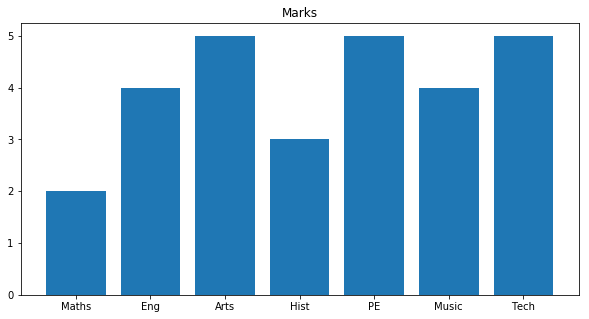

In [20]:
plt.figure(figsize=(10,5))
plt.bar(subjects, marks)
plt.title("Marks")
plt.show()
plt.close()

We would now like to add a line representing the average mark to the diagram. We shall first compute the average mark:

In [21]:
am = average(marks)

and then plot a sequence of data that looks like this:

`[am, am, am, am, am, am, am]`]`

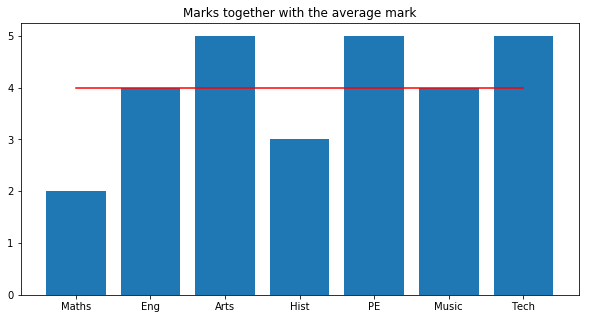

In [22]:
plt.figure(figsize=(10,5))
plt.bar(subjects, marks)
plt.plot(subjects, [am, am, am, am, am, am, am], color="r")
plt.title("Marks together with the average mark")
plt.show()
plt.close()

If we have to create a list of length `n` containing the same number `s` we can write

`[s, s, s, (etc n times)]`

as we did above, but we can also do it in a more consice and clever way like this:

`[s]*n`

Multiplying a list by a number `n` in Python as above produces a larger list which contains `n` copies of the original list. We thus get the following "more elegant" version of the code to plot the diagram:

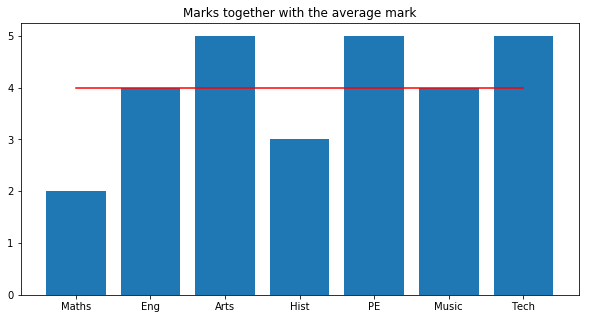

In [23]:
plt.figure(figsize=(10,5))
plt.bar(subjects, marks)
plt.plot(subjects, [am] * len(marks), color="r")
plt.title("Marks together with the average mark")
plt.show()
plt.close()

As the icing on the cake, let us also add a legend to the chart:

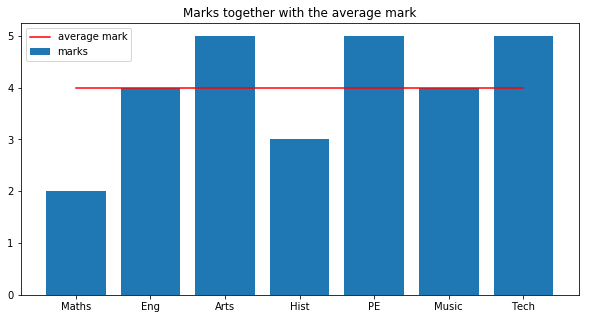

In [24]:
plt.figure(figsize=(10,5))
plt.bar(subjects, marks, label="marks")
plt.plot(subjects, [am] * len(marks), color="r", label="average mark")
plt.title("Marks together with the average mark")
plt.legend()
plt.show()
plt.close()

Let us now visualize the salaries in the company we have been discussing. As we have seen the list `salaries` is a big one, so _this may take some time. Courage and patience, my friend!_

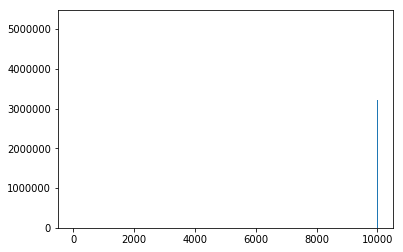

In [25]:
n = len(salaries)
plt.bar(range(n), salaries)
plt.show()
plt.close()

Well, this is really bad...

In order to get a chart that resembles reality we will have to resize the chart and limit the values that we represent on the $y$-axis. We already know that the average salary in the company is around \\$3912 and that onlu 12 employees have the salary which is above the average. We shall, therefore, limit the $y$-values to the interval 0--6000 and at the same time display the average salary as a red line.

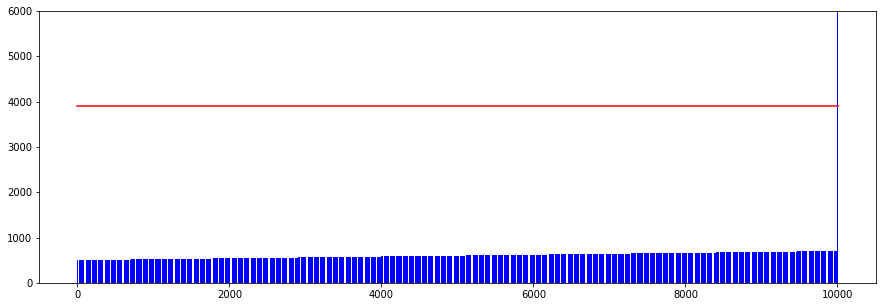

In [26]:
n = len(salaries)
plt.figure(figsize=(15,5))
plt.bar(range(n), salaries, color="b")
plt.plot([0, n-1], [average_salary, average_salary], color="r")
plt.ylim(0,6000)
plt.show()
plt.close()

One look at this chart suffices to conclude that the enormous salaries of a few employees have pushed the average salary to \\$3912, while most of the other salaries are far below the average.

Let us now create another chart where we display the median by a red bar.

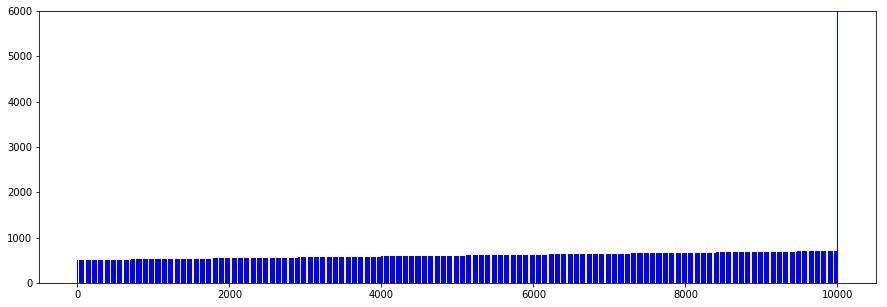

In [27]:
n = len(salaries)
plt.figure(figsize=(15,5))
plt.bar(range(n), salaries, color="b")
plt.bar([n//2], [salaries[n//2]], color="r") # this is the median!
plt.ylim(0,6000)
plt.show()
plt.close()

OK, now, where is the red bar in the middle?

We are trying to squeeze 10,000 numbers into a relatively small rectangle, so each bar is actually very thin. The thin red bar is drowning among thousands of blue bars. In order to make it stand out we shall have to change not only the color, but also the width of the bar representing the median. We'll do that using the `width` option of the `bar` function.

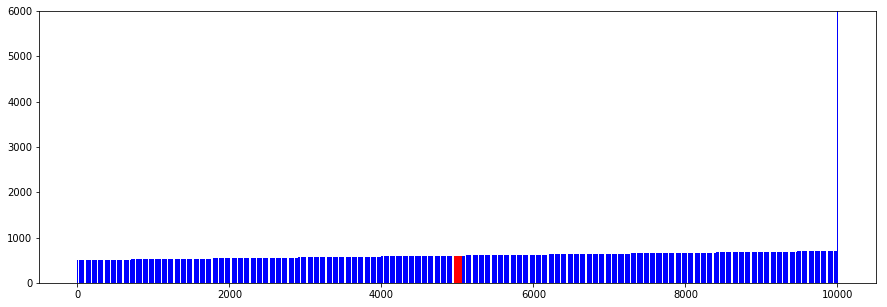

In [28]:
n = len(salaries)
plt.figure(figsize=(15,5))
plt.bar(range(n), salaries, color="b")
plt.bar([n//2], [salaries[n//2]], color="r", width=100) # this is the median!
plt.ylim(0,6000)
plt.show()
plt.close()

## 4.5. Exercises

**Exercise 1.** A book with short stories for children has only 12 pages -- a story per page. These stories are intended for small children, so none of them nas many words: 271, 354, 296, 301, 333, 326, 285, 298, 327, 316, 287 and 314, respectively. What is the average number of words in a story in this book?

**Exercise 2.** 

_(a)_ Marko lives in Serbia and goes to school there. He has four marks in Maths: 5, 4, 5 and another mark which is not legible. We know that his average mark in Maths is 4, though. What is the illegible mark?

_(b)_ How many 5's Marko has to get to ensure that his average mark is at least 4.50 (in which case the teacher is forced by the system to give him 5 as the final mark)?

(Hint: you can solve _(a)_ by hand; to solve _(b)_ add a new cell below this one and play with the `average` function.)

**Exercise 3.** Petar is another student who lives in Serbia. He has several marks in Maths, but definitely less than 10. We know that 25% of his marks in Math are 5, while 12.5% of his Maths' marks are 3.

_(a)_ How many marks does Petar have in Maths?

_(b)_ How many 5's and how many 3's?

_(c)_ What is the average of his Maths' marks if we know for sure that none of them is 1 or 2?

**Exercise 4.** Here is the list of Vesna's marks:

In [29]:
vesna_marks = [5, 5, 4, 5, 4, 3, 4, 5, 5, 5]

Let `vesna_average` be her average mark:

In [30]:
vesna_average = average(vesna_marks)

Take a careful look at the following code and then answer the questions below:

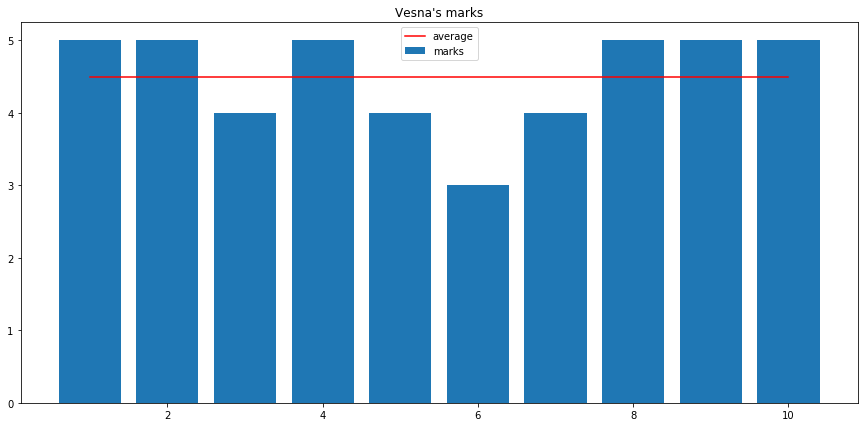

In [31]:
plt.figure(figsize=(15,7))
plt.bar(range(1,11), vesna_marks, label="marks")
plt.plot(range(1,11), [vesna_average] * 10, color="r", label="average")
plt.title("Vesna's marks")
plt.legend()
plt.show()
plt.close()

1. What does `plt.figure(figsize=(15,7))` do?
2. What does `range` do?
3. What does `legend` do? What does it have to do with the option `label` in functions `bar` and `plot`?
4. How would you change the size of the chart to make it square?
5. How would you change the color of bars to green?
6. What is the meaning of the expression `[vesna_average] * 10` and why do we need it?
7. How woud you remove the legend from the chart?

**Exercise 5.** Create a chart with Petar's marks (the guy from Exercise 3) so that his marks are displayed as blue bars, his average mark is displayed as a red line, and the median mark is displayed as a green bar. The chart should have a legend.

**Exercise 6.** The first ten places on the ATP list on July 21st, 2109 look like this:

In [32]:
tennis_players = ["Đoković", "Nadal", "Federer", "Thiem", "Zverev", "Tsipras", "Nishikori", "Khachanov", "Fognini", "Medvedev"]
ATP_points     = [12415,      7945,    7460,      4595,   4325,     4045,       4040,        2890,        2785,      2625]

_(a)_ Visualuze this using a bar chart. Display the average of their points by a red line.

_(b)_ How many of the top ten tennis players are above the average?